In [1]:
import math
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from GAN import GAN, Discriminator, Generator
from Discriminators import *
from Generators import *
from utils import get_dataset, split_dataset
import torchvision.utils as vutils
from random import shuffle

/data/cino/conda/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/data/cino/conda/anaconda3/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZNK3c107SymBool10guard_boolEPKcl'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
train, test = get_dataset(dataroot='../data/', dataset="MNIST")

In [3]:
classes = list(range(10))
shuffle(classes)
class_split = {str(i): classes[i*2: (i+1)*2] for i in range(5)}

In [4]:
class_split

{'0': [2, 5], '1': [1, 8], '2': [9, 0], '3': [4, 3], '4': [6, 7]}

In [5]:
train, test = get_dataset(dataroot='../data/', dataset="MNIST")
train_tasks = split_dataset(train, class_split)
val_tasks = split_dataset(test, class_split)

In [6]:
# Build dataloader
dl = DataLoader(dataset=train, shuffle=True, batch_size=256)
dl_validation = DataLoader(dataset=test, shuffle=False, batch_size=256)

In [7]:
loss = nn.BCEWithLogitsLoss()
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
output = loss(input, target)

In [8]:
target

tensor([1., 1., 1.])

In [13]:
model = Discriminator(in_features = 28*28, out_features = 1).cuda()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for task, data in train_tasks.items():
    loader = DataLoader(dataset=data, shuffle=True, batch_size=256)

for epoch in range(10):
    epoch_loss = 0
    total = 0
    correct = 0
    for e, (X, y) in enumerate(loader):
        if torch.cuda.is_available():
            X, y = X.cuda(), y.cuda()
        output = model(X)

        y = (y == data[0][1]).float().view(-1, 1)

        loss = criterion(output, y)
        optimizer.zero_grad()
        loss.backward() 

        epoch_loss += loss.item()
        correct = 0
        total += len(X)

        print(f"Epoch {epoch}: Loss {epoch_loss/(e+1):.3f} Acc: {correct/total:.3f}")

Epoch 0: Loss 0.707 Acc: 0.000
Epoch 0: Loss 0.704 Acc: 0.000
Epoch 0: Loss 0.698 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.697 Acc: 0.000
Epoch 0: Loss 0.699 Acc: 0.000
Epoch 0: Loss 0.699 Acc: 0.000
Epoch 0: Loss 0.698 Acc: 0.000
Epoch 0: Loss 0.699 Acc: 0.000
Epoch 0: Loss 0.699 Acc: 0.000
Epoch 0: Loss 0.699 Acc: 0.000
Epoch 0: Loss 0.699 Acc: 0.000
Epoch 0: Loss 0.698 Acc: 0.000
Epoch 0: Loss 0.697 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.695 Acc: 0.000
Epoch 0: Loss 0.695 Acc: 0.000
Epoch 0: Loss 0.695 Acc: 0.000
Epoch 0: Loss 0.695 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.695 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0: Loss 0.696 Acc: 0.000
Epoch 0:

In [16]:
# Instantiate Discriminator and Generator
d = DiscriminatorConv()
g = GeneratorConv()

gan = GAN(
    g, 
    d,
    d_lr = 0.0002,
    g_lr = 0.002
)

Training on [cuda]...
Epoch [1/100]:
epoch_d_loss: 0.132361 	epoch_g_loss: 5.005026
Epoch [2/100]:
epoch_d_loss: 0.002823 	epoch_g_loss: 7.924866
Epoch [3/100]:
epoch_d_loss: 0.000803 	epoch_g_loss: 8.432432
Epoch [4/100]:
epoch_d_loss: 0.000445 	epoch_g_loss: 9.016037
Epoch [5/100]:
epoch_d_loss: 0.006660 	epoch_g_loss: 9.751107
Epoch [6/100]:
epoch_d_loss: 0.175462 	epoch_g_loss: 6.443598
Epoch [7/100]:
epoch_d_loss: 0.094369 	epoch_g_loss: 5.991217
Epoch [8/100]:
epoch_d_loss: 0.060169 	epoch_g_loss: 5.976857
Epoch [9/100]:
epoch_d_loss: 0.053921 	epoch_g_loss: 6.529725
Epoch [10/100]:
epoch_d_loss: 0.101548 	epoch_g_loss: 6.161186


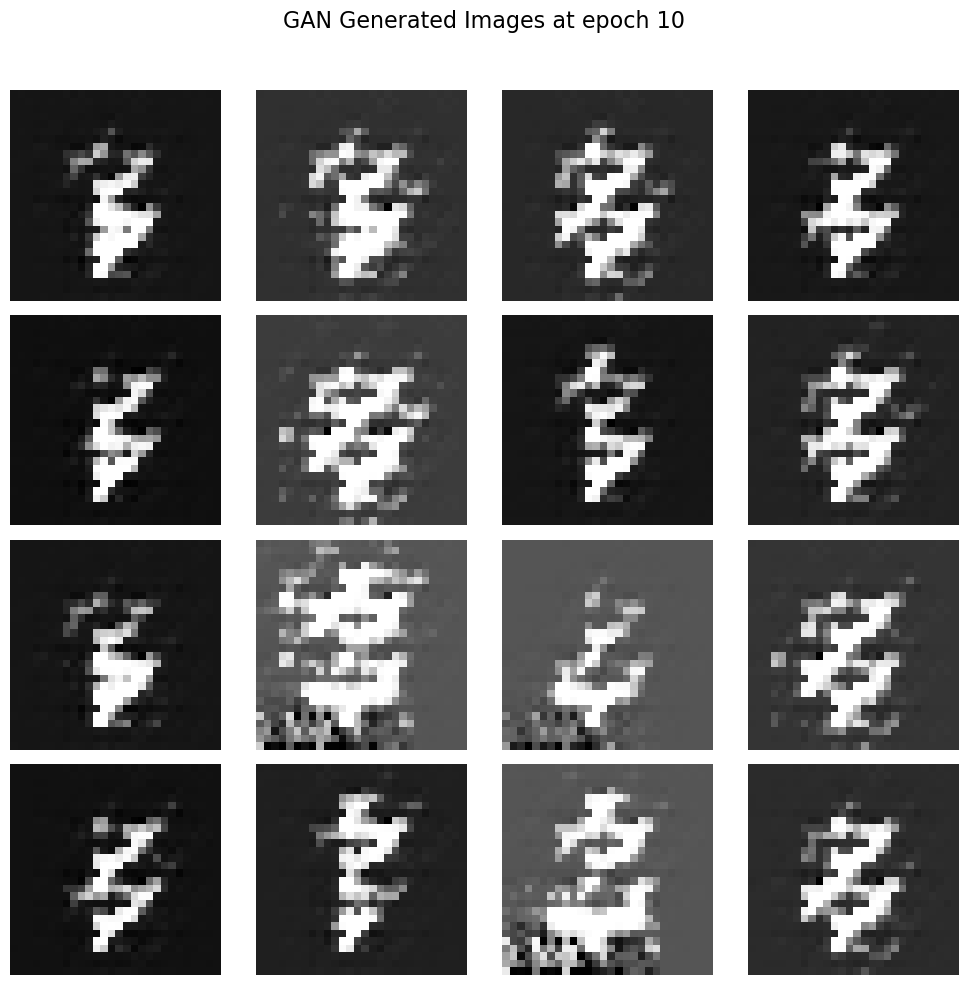

Epoch [11/100]:
epoch_d_loss: 0.060380 	epoch_g_loss: 6.559449
Epoch [12/100]:
epoch_d_loss: 0.075859 	epoch_g_loss: 6.246803
Epoch [13/100]:
epoch_d_loss: 0.063644 	epoch_g_loss: 5.754177
Epoch [14/100]:
epoch_d_loss: 0.065977 	epoch_g_loss: 5.682871
Epoch [15/100]:
epoch_d_loss: 0.058704 	epoch_g_loss: 6.212298
Epoch [16/100]:
epoch_d_loss: 0.057011 	epoch_g_loss: 6.278760
Epoch [17/100]:
epoch_d_loss: 0.078509 	epoch_g_loss: 6.604308
Epoch [18/100]:
epoch_d_loss: 0.073551 	epoch_g_loss: 6.146551
Epoch [19/100]:
epoch_d_loss: 0.123406 	epoch_g_loss: 5.192105
Epoch [20/100]:
epoch_d_loss: 0.219267 	epoch_g_loss: 5.600553


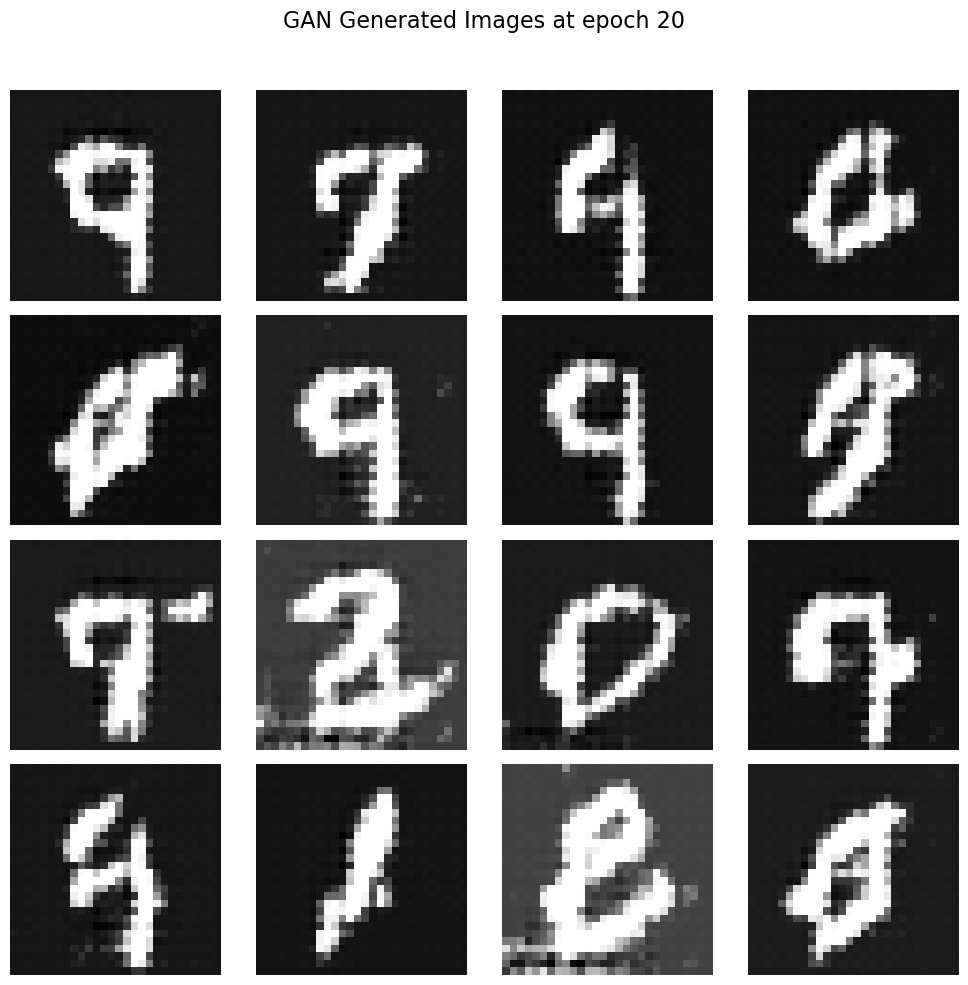

Epoch [21/100]:
epoch_d_loss: 0.231220 	epoch_g_loss: 4.592332
Epoch [22/100]:
epoch_d_loss: 0.334283 	epoch_g_loss: 3.967464
Epoch [23/100]:
epoch_d_loss: 0.376805 	epoch_g_loss: 3.426002
Epoch [24/100]:
epoch_d_loss: 0.420007 	epoch_g_loss: 3.361082
Epoch [25/100]:
epoch_d_loss: 0.452670 	epoch_g_loss: 3.006788
Epoch [26/100]:
epoch_d_loss: 0.544175 	epoch_g_loss: 3.161752
Epoch [27/100]:
epoch_d_loss: 0.548293 	epoch_g_loss: 2.903944
Epoch [28/100]:
epoch_d_loss: 0.549246 	epoch_g_loss: 2.866420
Epoch [29/100]:
epoch_d_loss: 0.670652 	epoch_g_loss: 2.502061
Epoch [30/100]:
epoch_d_loss: 0.728187 	epoch_g_loss: 2.162059


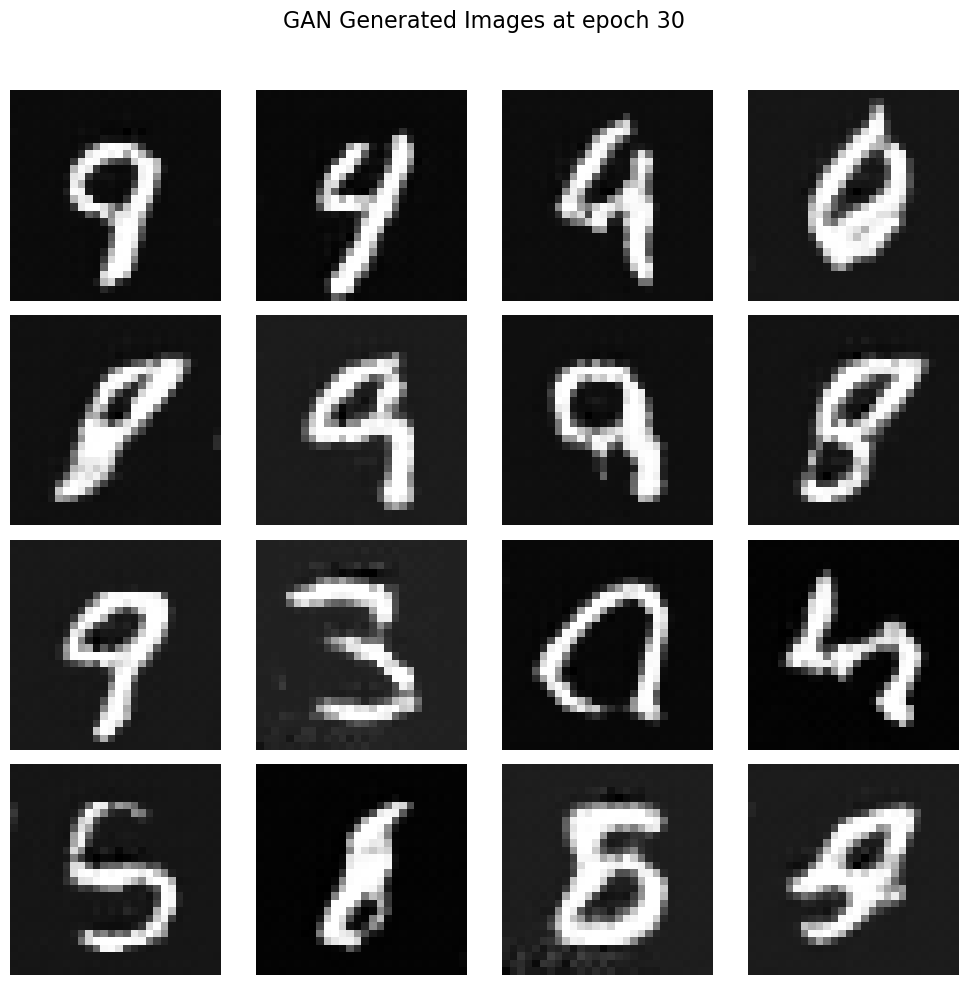

Epoch [31/100]:
epoch_d_loss: 0.783859 	epoch_g_loss: 2.092818
Epoch [32/100]:
epoch_d_loss: 0.779994 	epoch_g_loss: 2.349143
Epoch [33/100]:
epoch_d_loss: 0.865672 	epoch_g_loss: 2.130983
Epoch [34/100]:
epoch_d_loss: 0.860526 	epoch_g_loss: 1.821635
Epoch [35/100]:
epoch_d_loss: 0.844059 	epoch_g_loss: 2.025205
Epoch [36/100]:
epoch_d_loss: 0.954679 	epoch_g_loss: 1.868671
Epoch [37/100]:
epoch_d_loss: 0.878402 	epoch_g_loss: 1.825102
Epoch [38/100]:
epoch_d_loss: 0.970227 	epoch_g_loss: 1.859343
Epoch [39/100]:
epoch_d_loss: 0.941432 	epoch_g_loss: 1.713469
Epoch [40/100]:
epoch_d_loss: 1.029444 	epoch_g_loss: 1.669848


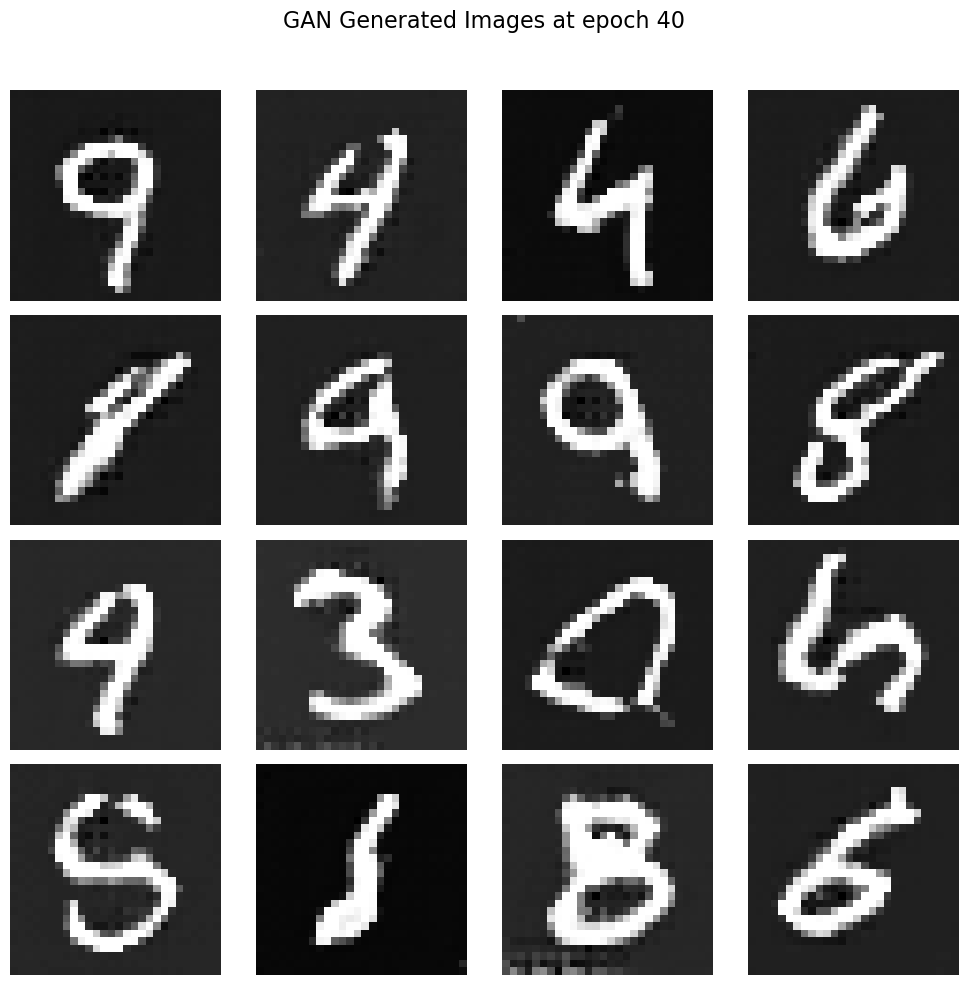

Epoch [41/100]:
epoch_d_loss: 1.033019 	epoch_g_loss: 1.540817
Epoch [42/100]:
epoch_d_loss: 1.019295 	epoch_g_loss: 1.540155
Epoch [43/100]:
epoch_d_loss: 1.078396 	epoch_g_loss: 1.431850
Epoch [44/100]:
epoch_d_loss: 1.036483 	epoch_g_loss: 1.475859
Epoch [45/100]:
epoch_d_loss: 1.092011 	epoch_g_loss: 1.475907
Epoch [46/100]:
epoch_d_loss: 1.163060 	epoch_g_loss: 1.415359
Epoch [47/100]:
epoch_d_loss: 1.134773 	epoch_g_loss: 1.322006
Epoch [48/100]:
epoch_d_loss: 1.103872 	epoch_g_loss: 1.623413
Epoch [49/100]:
epoch_d_loss: 1.166203 	epoch_g_loss: 1.394455
Epoch [50/100]:
epoch_d_loss: 1.122143 	epoch_g_loss: 1.361153


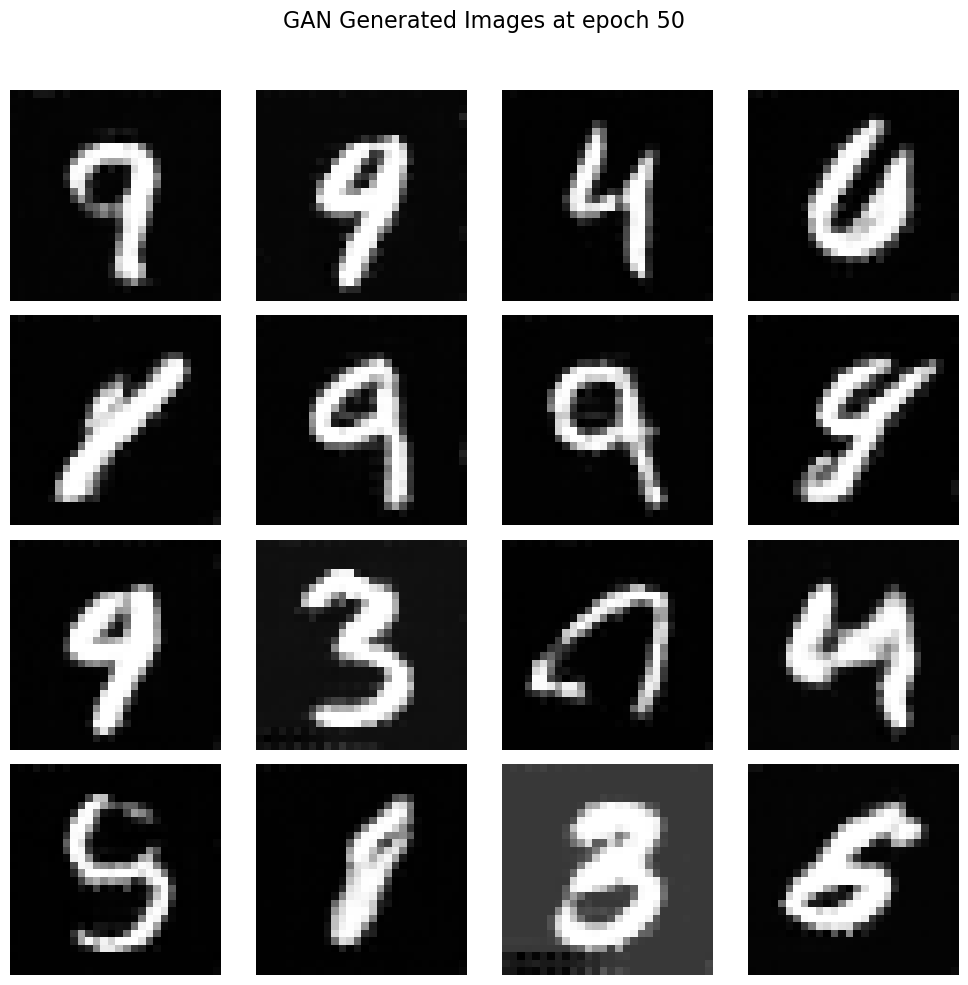

Epoch [51/100]:
epoch_d_loss: 1.186403 	epoch_g_loss: 1.239457
Epoch [52/100]:
epoch_d_loss: 1.209119 	epoch_g_loss: 1.220680
Epoch [53/100]:
epoch_d_loss: 1.206080 	epoch_g_loss: 1.213142
Epoch [54/100]:
epoch_d_loss: 1.219972 	epoch_g_loss: 1.255701
Epoch [55/100]:
epoch_d_loss: 1.217617 	epoch_g_loss: 1.168827
Epoch [56/100]:
epoch_d_loss: 1.196124 	epoch_g_loss: 1.174572
Epoch [57/100]:
epoch_d_loss: 1.249860 	epoch_g_loss: 1.128860
Epoch [58/100]:
epoch_d_loss: 1.226952 	epoch_g_loss: 1.110360
Epoch [59/100]:
epoch_d_loss: 1.236261 	epoch_g_loss: 1.106945
Epoch [60/100]:
epoch_d_loss: 1.243932 	epoch_g_loss: 1.134991


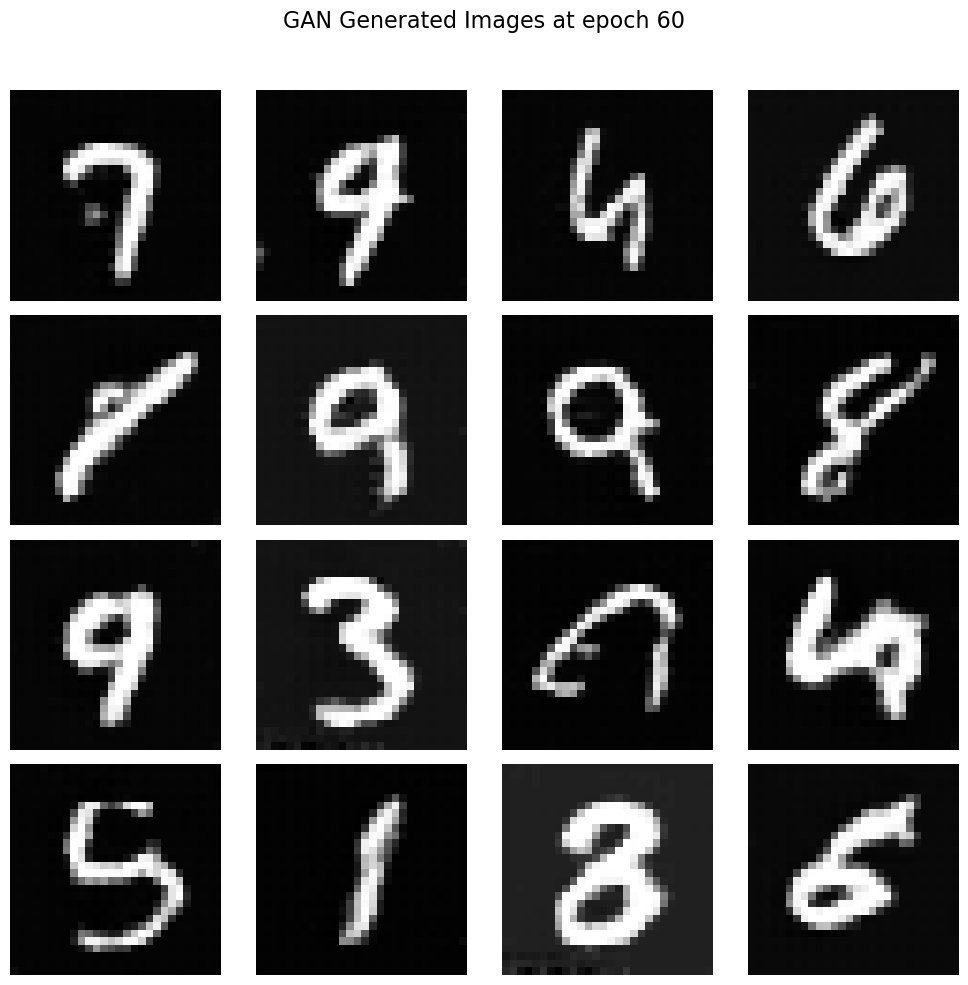

Epoch [61/100]:
epoch_d_loss: 1.271349 	epoch_g_loss: 1.102986
Epoch [62/100]:
epoch_d_loss: 1.259899 	epoch_g_loss: 1.115607
Epoch [63/100]:
epoch_d_loss: 1.268400 	epoch_g_loss: 1.120842
Epoch [64/100]:
epoch_d_loss: 1.244999 	epoch_g_loss: 1.140800
Epoch [65/100]:
epoch_d_loss: 1.256987 	epoch_g_loss: 1.180766
Epoch [66/100]:
epoch_d_loss: 1.254742 	epoch_g_loss: 1.112219
Epoch [67/100]:
epoch_d_loss: 1.293938 	epoch_g_loss: 1.038887
Epoch [68/100]:
epoch_d_loss: 1.261479 	epoch_g_loss: 1.038399
Epoch [69/100]:
epoch_d_loss: 1.264967 	epoch_g_loss: 1.092686
Epoch [70/100]:
epoch_d_loss: 1.263380 	epoch_g_loss: 1.027088


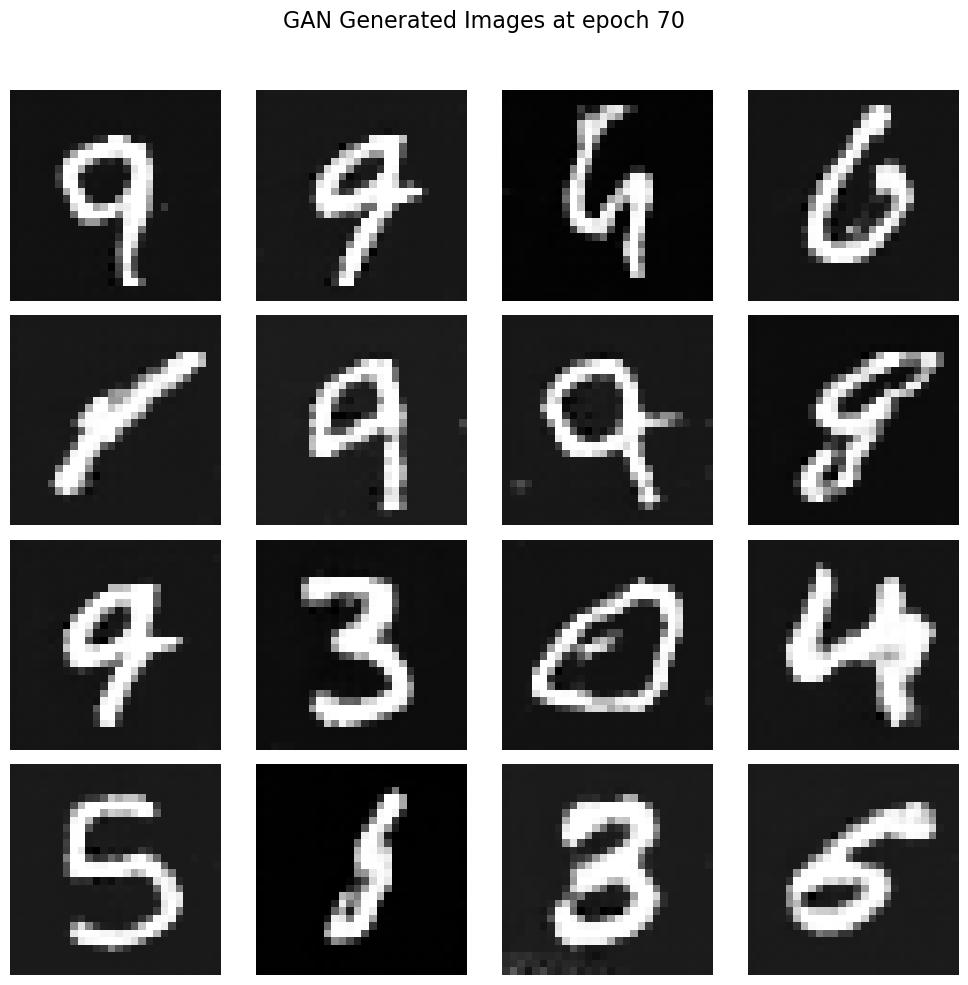

Epoch [71/100]:
epoch_d_loss: 1.294156 	epoch_g_loss: 0.978200
Epoch [72/100]:
epoch_d_loss: 1.256205 	epoch_g_loss: 1.022948
Epoch [73/100]:
epoch_d_loss: 1.272446 	epoch_g_loss: 1.119020
Epoch [74/100]:
epoch_d_loss: 1.269994 	epoch_g_loss: 1.081580
Epoch [75/100]:
epoch_d_loss: 1.278378 	epoch_g_loss: 1.022501
Epoch [76/100]:
epoch_d_loss: 1.277064 	epoch_g_loss: 1.118741
Epoch [77/100]:
epoch_d_loss: 1.230564 	epoch_g_loss: 1.126689
Epoch [78/100]:
epoch_d_loss: 1.292383 	epoch_g_loss: 1.097110
Epoch [79/100]:
epoch_d_loss: 1.293415 	epoch_g_loss: 0.999014
Epoch [80/100]:
epoch_d_loss: 1.298380 	epoch_g_loss: 0.946440


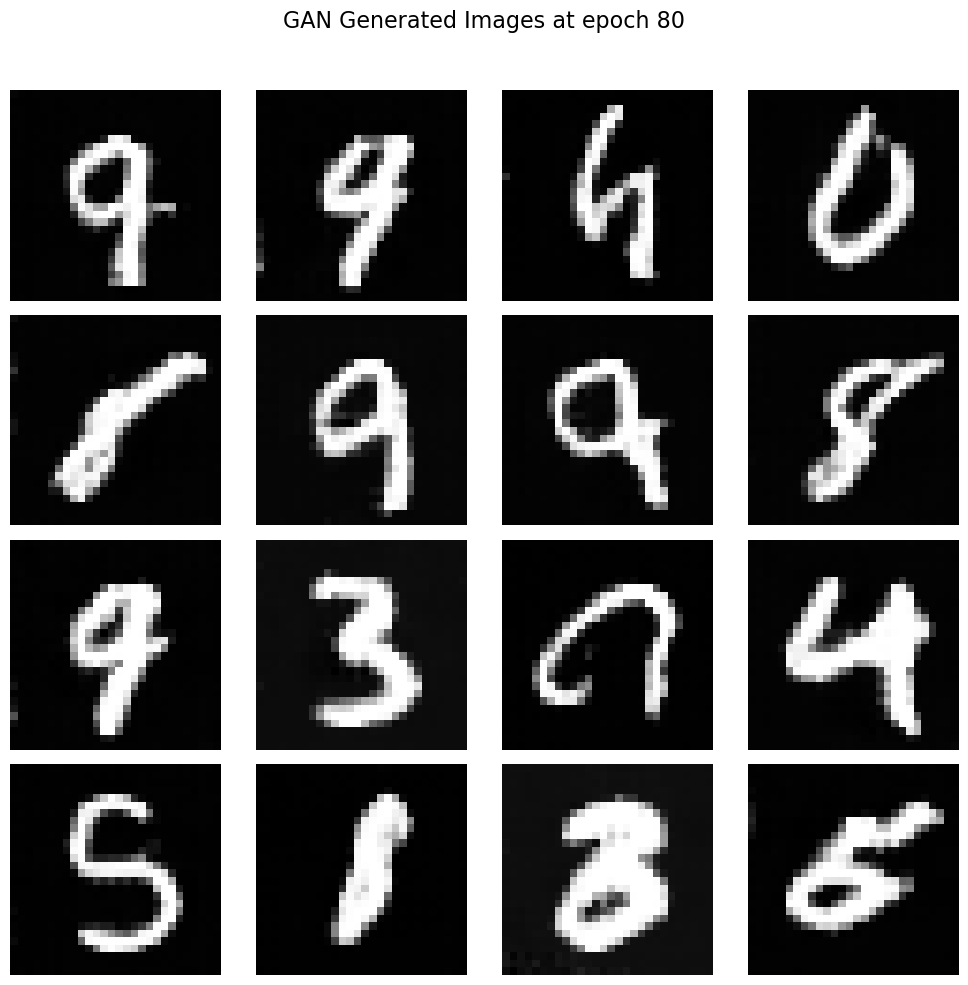

Epoch [81/100]:
epoch_d_loss: 1.264248 	epoch_g_loss: 0.966908
Epoch [82/100]:
epoch_d_loss: 1.277157 	epoch_g_loss: 0.945127
Epoch [83/100]:
epoch_d_loss: 1.283744 	epoch_g_loss: 0.946678
Epoch [84/100]:
epoch_d_loss: 1.274465 	epoch_g_loss: 0.965193
Epoch [85/100]:
epoch_d_loss: 1.310166 	epoch_g_loss: 0.956163
Epoch [86/100]:
epoch_d_loss: 1.283993 	epoch_g_loss: 0.964036
Epoch [87/100]:
epoch_d_loss: 1.290955 	epoch_g_loss: 0.936473
Epoch [88/100]:
epoch_d_loss: 1.297539 	epoch_g_loss: 0.891379
Epoch [89/100]:
epoch_d_loss: 1.294772 	epoch_g_loss: 0.940378
Epoch [90/100]:
epoch_d_loss: 1.268878 	epoch_g_loss: 0.965772


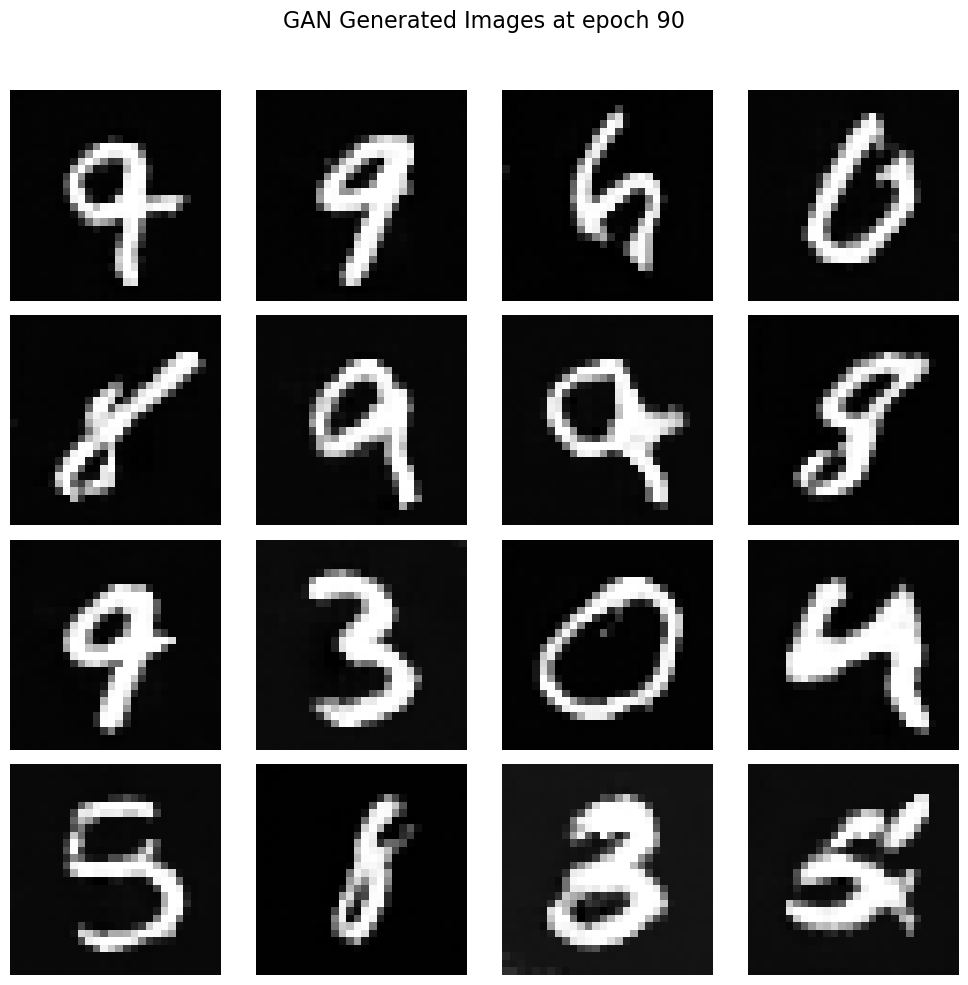

Epoch [91/100]:
epoch_d_loss: 1.284684 	epoch_g_loss: 0.970981
Epoch [92/100]:
epoch_d_loss: 1.284897 	epoch_g_loss: 0.952257
Epoch [93/100]:
epoch_d_loss: 1.280897 	epoch_g_loss: 0.975412
Epoch [94/100]:
epoch_d_loss: 1.254713 	epoch_g_loss: 0.972921
Epoch [95/100]:
epoch_d_loss: 1.298357 	epoch_g_loss: 0.931888
Epoch [96/100]:
epoch_d_loss: 1.290066 	epoch_g_loss: 1.012983
Epoch [97/100]:
epoch_d_loss: 1.295594 	epoch_g_loss: 0.954797
Epoch [98/100]:
epoch_d_loss: 1.304665 	epoch_g_loss: 0.916252
Epoch [99/100]:
epoch_d_loss: 1.305777 	epoch_g_loss: 0.888797
Epoch [100/100]:
epoch_d_loss: 1.300293 	epoch_g_loss: 0.860985


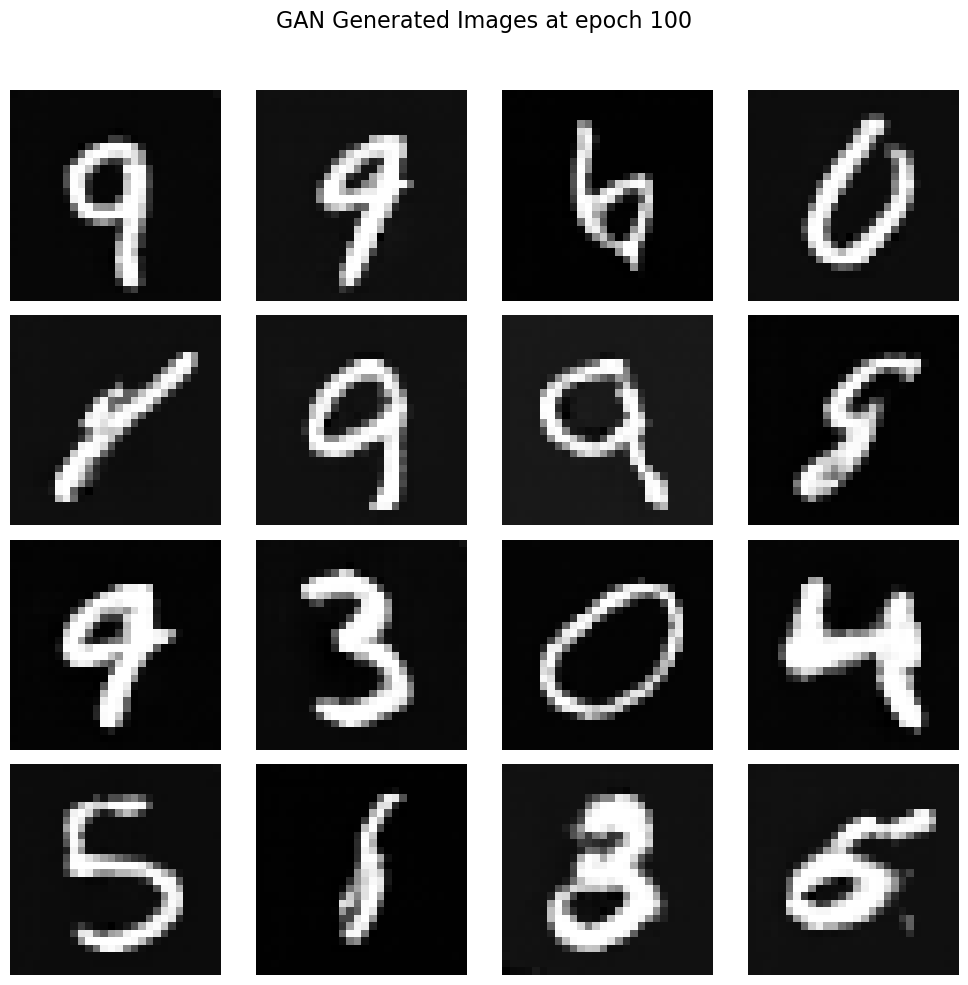

([0.13236120508072224,
  0.0028230689941568577,
  0.0008032630098626968,
  0.00044465255230031114,
  0.006659548840624221,
  0.17546203288626164,
  0.09436919029722822,
  0.06016889125742811,
  0.05392122471586187,
  0.10154766326254987,
  0.06038023766050948,
  0.07585940259568234,
  0.06364427120127576,
  0.06597684900811378,
  0.058703913587204955,
  0.05701099558079496,
  0.07850885594144781,
  0.07355123479315576,
  0.12340612208589595,
  0.21926657494078292,
  0.2312197908442071,
  0.334282538231383,
  0.3768047900910073,
  0.4200070969601895,
  0.45266950891373003,
  0.5441750059736535,
  0.5482925090383977,
  0.5492464755443817,
  0.6706516996343085,
  0.7281870740525266,
  0.7838587984125664,
  0.7799937146775267,
  0.8656717503324468,
  0.8605257724193817,
  0.8440592664353391,
  0.9546790589677526,
  0.8784018658577127,
  0.9702267910571809,
  0.9414319626828458,
  1.0294443333402592,
  1.0330187209109043,
  1.0192954205452127,
  1.0783960220661568,
  1.0364833750623337,
  1

In [17]:
gan.train_gan(dl)

In [ ]:
# Bring generator back to cpu and set eval mode on
g.to('cpu')
g.eval()
# Feed a latent vecor of size 100 to trained generator and get a fake generated image back
z = np.random.uniform(-1, 1, size=(1, 100))
z = torch.from_numpy(z).float()
fake_image = g(z)
# Reshape and display
fake_image = fake_image.view(1, 1, 28, 28).detach()
display_images(fake_image, n_cols=1, figsize=(2, 2))